# &#x1F4D1; &nbsp; $\mathfrak {\color{#348ABD} {P1: \ Predicting \ Boston \ Housing \ Prices}}$

## $\mathfrak {\color{#348ABD} {1. \ References}}$
#### Dataset
In this project, we will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a good fit could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

*Origin:* This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. 

*Creators:* Harrison, D. and Rubinfeld, D.L. 

*Data Set Information:* Concerns housing values in suburbs of Boston.

*Attribute Information:*

- CRIM: per capita crime rate by town 
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
- INDUS: proportion of non-retail business acres per town 
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
- NOX: nitric oxides concentration (parts per 10 million) 
- RM: average number of rooms per dwelling 
- AGE: proportion of owner-occupied units built prior to 1940 
- DIS: weighted distances to five Boston employment centres 
- RAD: index of accessibility to radial highways 
- TAX: full-value property-tax rate per 10,000 USD
- PTRATIO: pupil-teacher ratio by town 
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
- LSTAT: % lower status of the population 
- MEDV: Median value of owner-occupied homes in 1000 USD

The Boston housing data was collected in 1978 and each of the 506 entries represents aggregated data about 14 features for homes from various suburbs. 

For the purposes of this project, the following preprocessing steps have been made to the dataset:

- 16 data points have an ***'MEDV'*** value of 50.0. These data points likely contain missing or censored values and have been removed.
- 1 data point has an ***'RM'*** value of 8.78. This data point can be considered an outlier and has been removed.
- The features ***'RM', 'LSTAT', 'PTRATIO',*** and ***'MEDV'*** are essential. The remaining non-relevant features have been excluded.
- The feature ***'MEDV'*** has been multiplicatively scaled to account for 35 years of market inflation.

#### Resources

Housing Data Set: https://archive.ics.uci.edu/ml/datasets/Housing

Scikit-learn: http://scikit-learn.org/stable/index.html

Seaborn: http://seaborn.pydata.org/index.html

## $\mathfrak {\color{#348ABD} {2.\ Code \ Library}}$

In [89]:
from IPython.core.display import HTML
hide_code = ''
HTML('''<script>code_show = true; 
function code_display() {
    if (code_show) {
        $('div.input').each(function(id) {
            if (id == 0 || $(this).html().indexOf('hide_code') > -1) {$(this).hide();}
        });
        $('div.output_prompt').css('opacity', 0);
    } else {
        $('div.input').each(function(id) {$(this).show();});
        $('div.output_prompt').css('opacity', 1);
    }
    code_show = !code_show;
} 
$(document).ready(code_display);</script>
<form action="javascript: code_display()"><input style="color: #348ABD; background: ghostwhite; opacity: 0.9; " \
type="submit" value="Click to display or hide code"></form>''')

In [93]:
hide_code
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import pylab as plt
from sklearn import datasets
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

################################
### ADD EXTRA LIBRARIES HERE ###
################################
import warnings
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn import grid_search

# Make matplotlib show our plots inline 
%matplotlib inline

## $\mathfrak {\color{#348ABD} { 3. \ Statistical\ Analysis \ and \ Data \ Exploration}}$
#### 3.1 Data Loading
We can compare the description of the original data and the dataset transformed for the project.

In [65]:
hide_code
# Load the original Boston Housing dataset into the boston_data variable
boston_data = datasets.load_boston()
prices0 = boston_data.target
features0 = boston_data.data

In [66]:
hide_code
boston_data['DESCR']

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [67]:
hide_code
# Load the transformed Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print ("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


In [68]:
hide_code
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RM,489.0,6.240288,0.643650,3.561,5.88,6.185,6.575,8.398
LSTAT,489.0,12.939632,7.081990,1.980,7.37,11.690,17.120,37.970
PTRATIO,489.0,18.516564,2.111268,12.600,17.40,19.100,20.200,22.000
MEDV,489.0,454342.944785,165340.277653,105000.000,350700.00,438900.000,518700.000,1024800.000


#### 3.2 Requested Statistics
In this section of this project, we will make a cursory investigation about the Boston housing data and provide observations. 

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into the ***features*** and the ***target*** variable. The features, ***'RM', 'LSTAT', and 'PTRATIO'***, give us quantitative information about each data point. The target variable, ***'MEDV'***, will be the variable we seek to predict. These are stored in ***features*** and ***prices***, respectively.

In [69]:
hide_code
print ("Boston Housing Dataset Statistics: \n")
print ("Number of houses = ", len(prices))
print ("Number of features = ", len(list(features.keys())))
print ("Minimum house price = ", np.min(prices))
print ("Maximum house price = ", np.max(prices))
print ("Mean house price = ", "%.2f" % np.mean(prices))
print ("Median house price = ", "%.2f" % np.median(prices))
print ("Standard deviation of house prices =", "%.2f" % np.std(prices))

Boston Housing Dataset Statistics: 

Number of houses =  489
Number of features =  3
Minimum house price =  105000.0
Maximum house price =  1024800.0
Mean house price =  454342.94
Median house price =  438900.00
Standard deviation of house prices = 165171.13


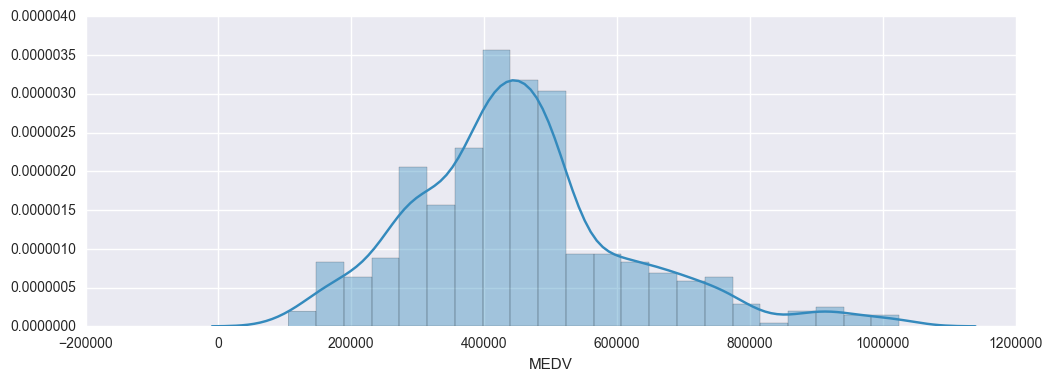

In [70]:
hide_code
warnings.filterwarnings('ignore')
plt.style.use('seaborn-bright')
plt.figure(figsize=(12,4))
sns.distplot(prices, color='#348ABD')

#### Question 1 - Feature Observation
For each data point (neighborhood):

- 'RM' is the average number of rooms among homes in the neighborhood.
- 'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- 'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an ***increase*** in the value of 'MEDV' or a ***decrease*** in the value of 'MEDV'? Justify your answer for each.

#### Answer 1
My assumptions could be:

- RM: shows the level of home comfort, its increase would lead to the increase in the value of 'MEDV';
- PTRATIO: shows the level of educational resources, its increase would lead to the decrease in the value of 'MEDV';
- LSTAT: indicates the level of social environment comfort, its increase would lead to the decrease in the value of 'MEDV'.

I have made the correlation list for all features in the original dataset to confirm the assumptions. 

In [71]:
hide_code
boston_df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston_df['MEDV'] = boston_data.target
pearson = boston_df.corr(method='pearson')
corr_with_prices = pearson.ix[-1][:-1]
corr_with_prices[abs(corr_with_prices).argsort()[::-1]]

LSTAT     -0.737663
RM         0.695360
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.385832
RAD       -0.381626
AGE       -0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

And I have created plots for the transformed features with the least squares regression fitted line and the hexagon-aggregated 2D histograms as an example to illustrate the trends.

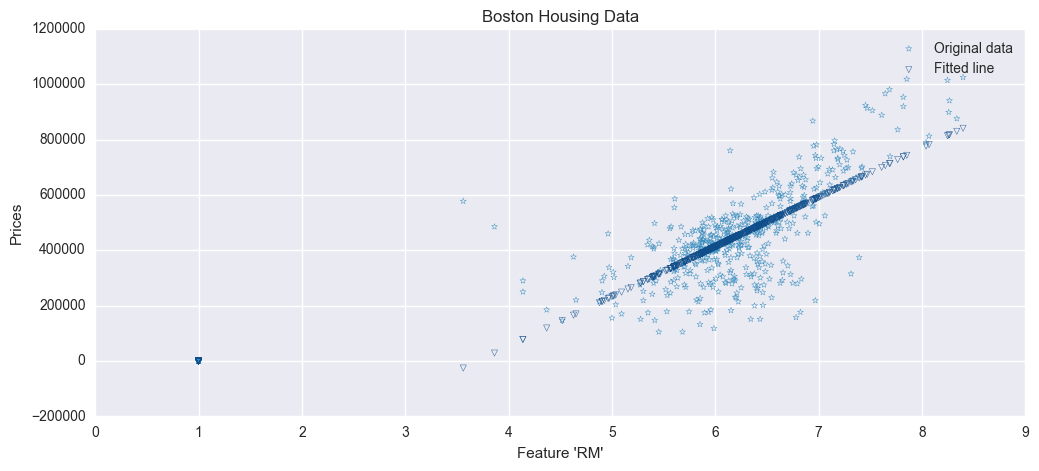

In [72]:
hide_code
plt.figure(figsize=(12,5))
x, y = features['RM'], prices
x1 = np.array([[v,1] for v in x])
y1 = np.array([[v,1] for v in y])
(slope,bias),_,_,_ = np.linalg.lstsq(x1,y1)
y_lin = x1 * slope + bias
plt.scatter(x1, y1, color='#348ABD', marker='*', facecolors='none', label='Original data')
plt.scatter(x1, y_lin, color='#104E8B', marker='v', facecolors='none', label='Fitted line')
plt.xlabel("Feature 'RM'")
plt.ylabel("Prices")
plt.title('Boston Housing Data')
plt.legend()

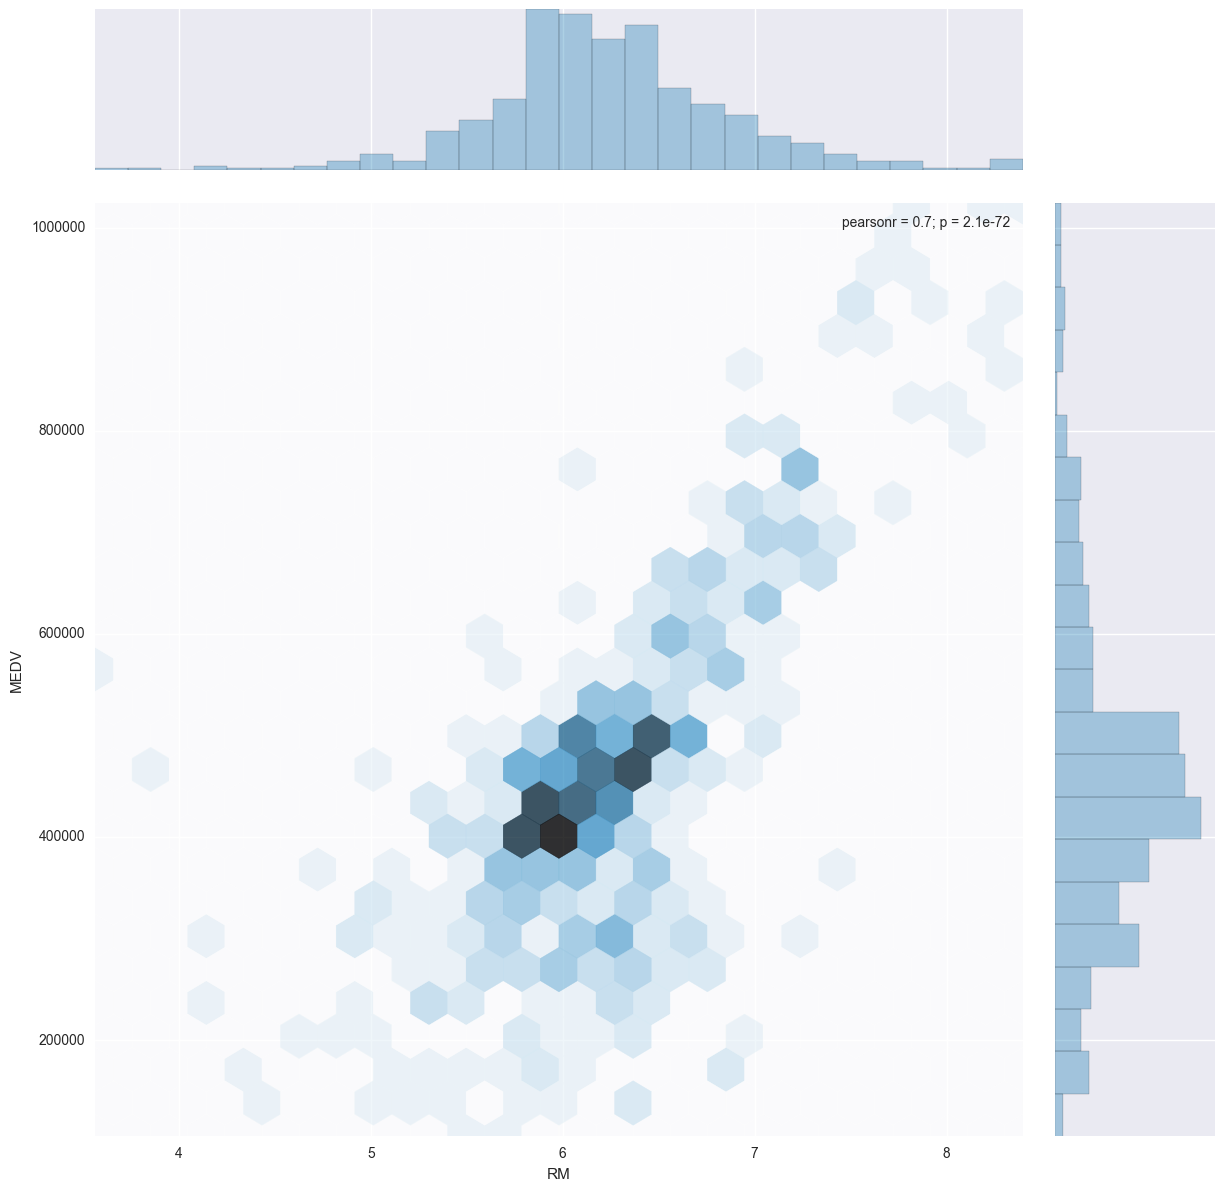

In [73]:
hide_code
sns.jointplot(x, y, kind='hex', joint_kws={'alpha':0.8}, size=12, color='#348ABD')

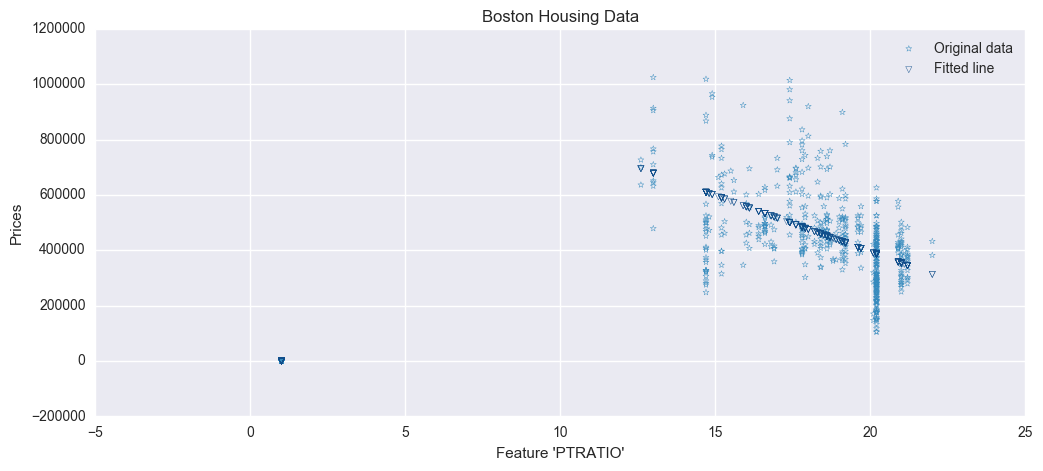

In [74]:
plt.figure(figsize=(12,5))
x = features['PTRATIO']
x1 = np.array([[v,1] for v in x])
(slope,bias),_,_,_ = np.linalg.lstsq(x1,y1)
y_lin = x1 * slope + bias
plt.scatter(x1, y1, color='#348ABD', marker='*', facecolors='none', label='Original data')
plt.scatter(x1, y_lin, color='#104E8B', marker='v', facecolors='none', label='Fitted line')
plt.xlabel("Feature 'PTRATIO'")
plt.ylabel("Prices")
plt.title('Boston Housing Data')
plt.legend()

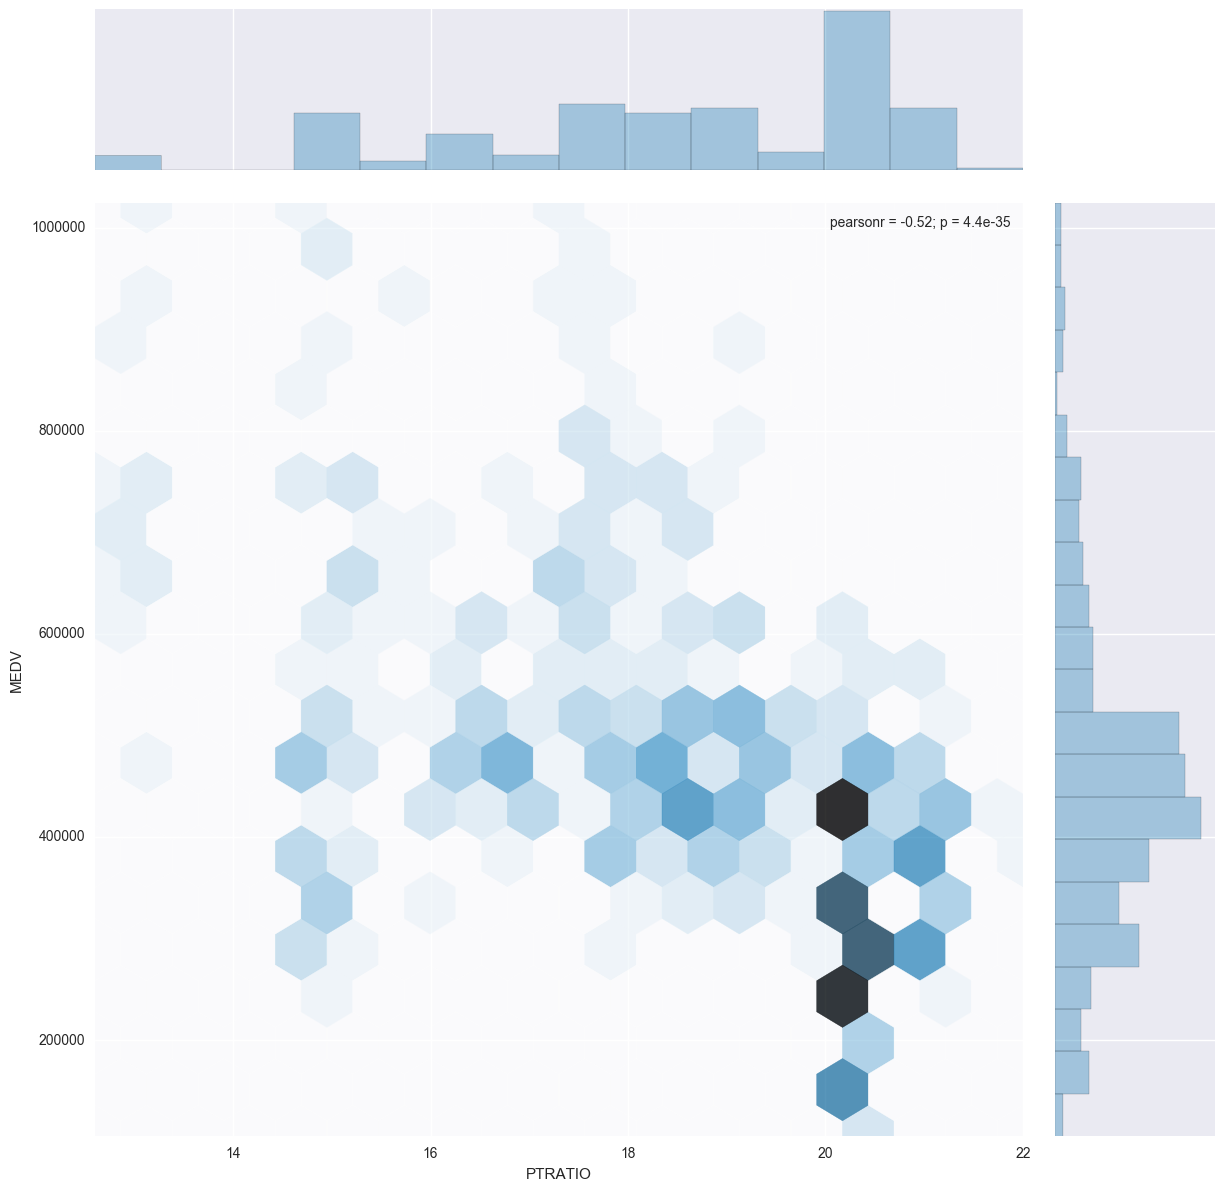

In [75]:
hide_code
sns.jointplot(x, y, kind='hex', joint_kws={'alpha':0.8}, size=12, color='#348ABD')

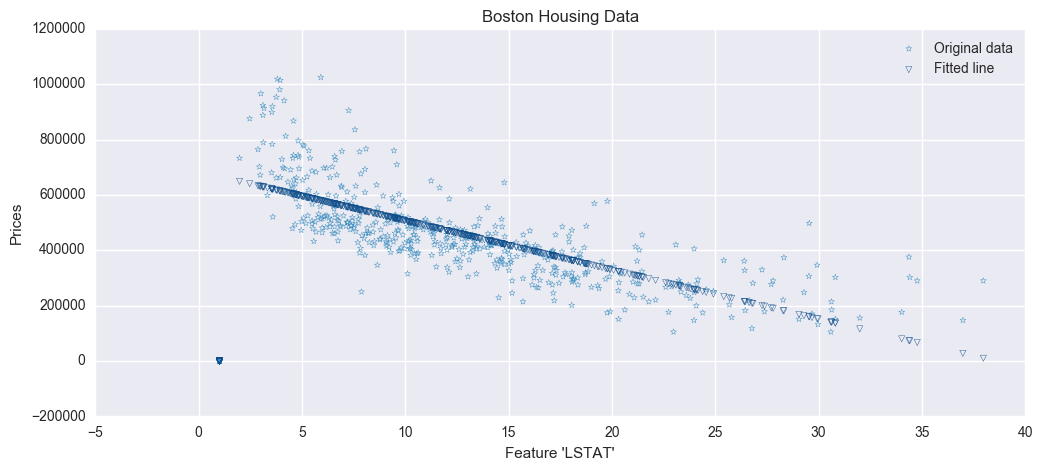

In [76]:
hide_code
plt.figure(figsize=(12,5))
x = features['LSTAT']
x1 = np.array([[v,1] for v in x])
(slope,bias),_,_,_ = np.linalg.lstsq(x1,y1)
y_lin = x1 * slope + bias
plt.scatter(x1, y1, color='#348ABD', marker='*', facecolors='none', label='Original data')
plt.scatter(x1, y_lin, color='#104E8B', marker='v', facecolors='none', label='Fitted line')
plt.xlabel("Feature 'LSTAT'")
plt.ylabel("Prices")
plt.title('Boston Housing Data')
plt.legend()

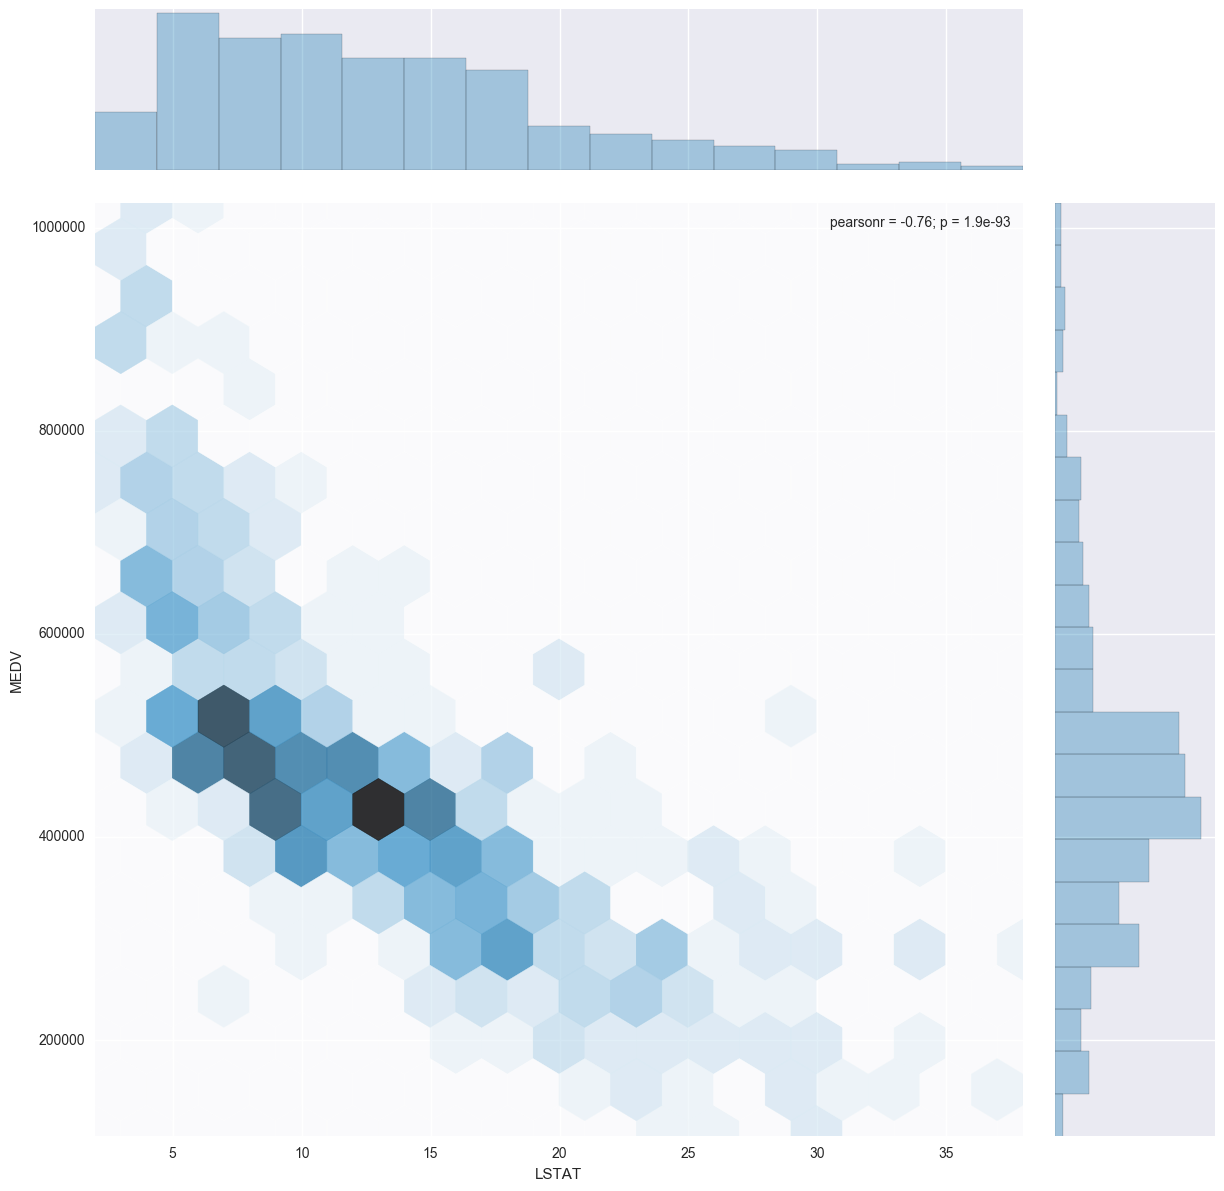

In [77]:
hide_code
sns.jointplot(x, y, kind='hex', joint_kws={'alpha':0.8}, size=12, color='#348ABD')


## $\mathfrak {\color{#348ABD} {4. \ Developing \ a \ Model}}$
In this section of the project, we will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in the predictions.
#### 4.1 Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing.

This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, we will be calculating the coefficient of determination, ${R^2}$, to quantify the model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.

The values for ${R^2}$ range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an ${R^2}$ of 0 is no better than a model that always predicts the mean of the target variable, whereas a model with an ${R^2}$ of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features. A model can be given a negative ${R^2}$ as well, which indicates that the model is arbitrarily worse than one that always predicts the mean of the target variable.

For the ***performance_metric*** function, we will need to implement the following:

- use r2_score from sklearn.metrics to perform a performance calculation between y_true and y_predict;
- assign the performance score to the score variable.

In [101]:
hide_code
# Import 'r2_score'
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

#### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

- True Value	Prediction
- &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.0&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.5
- &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-0.5&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.0
- &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.0&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.1
- &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;7.0&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;7.8
- &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.2&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.3

Would you consider this model to have successfully captured the variation of the target variable? Why or why not?

In [102]:
hide_code
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


#### Answer 2

#### 4.2  Shuffle and Split Data
The next implementation requires that we take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is splitted and shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

In [110]:
hide_code
# Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 1)

# Success
print ("Training and testing split was successful.")

Training and testing split was successful.


#### Question 3 - Training and Testing
What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

#### Answer 3
We should not only build a predictive model but also assess the quality of it. Naturally, we would like to know how our predictions will be relatively close to the actual outcomes.

We usually split the data into training and testing subsets exactly for this goal. The training set is used to choose the most effective parameters for given models, but what kind of model we should apply and how the concrete model works we can evaluate with the test set.

It helps to avoid overfitting, i.e. the cases when the built model will fit extremely well for the training sets but will not work with real data because of catching non-existing trends.

## $\mathfrak {\color{#348ABD} { 5. \ Analyzing \ Model \ Performance}}$
In this section of the project, we will take a look at several models' learning and testing performances on various subsets of training data. Additionally, we'll investigate one particular algorithm with an increasing ***max_depth*** parameter on the full training set to observe how model complexity affects performance. Graphing the model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.
#### 5.1 Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. The shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using ${R^2}$, the coefficient of determination.

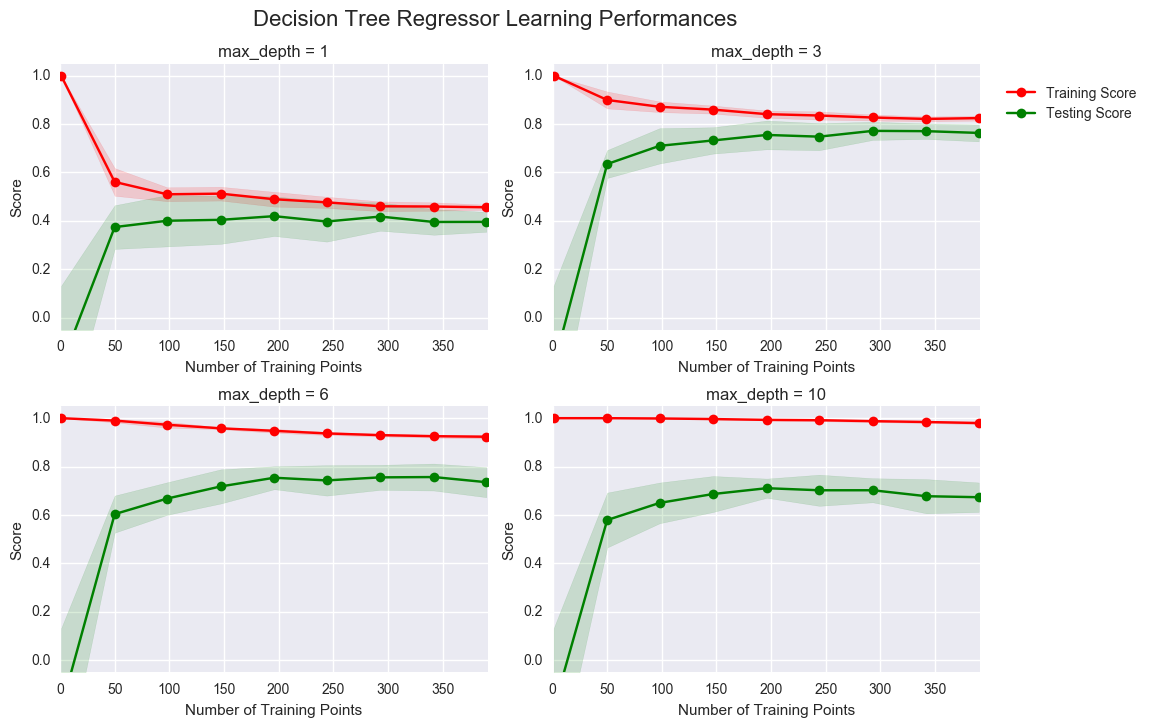

In [129]:
hide_code
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

#### Question 4 - Learning the Data
Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?
#### Answer 4

#### 5.2 Complexity Curves
Now we produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph shows two ***complexity curves*** — one for training and one for validation. Similar to the learning curves, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the ***performance_metric*** function.

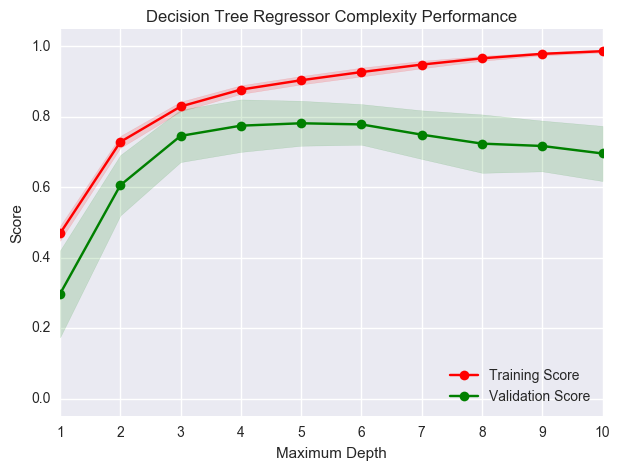

In [112]:
hide_code
vs.ModelComplexity(X_train, y_train)

#### Question 5 - Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

#### Answer 5


#### Question 6 - Best-Guess Optimal Model
Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?

#### Answer 6



## $\mathfrak {\color{#348ABD} { 6. \ Evaluating \ Model \ Performance }}$
In this section of the project, we will construct a model and make a prediction on the client's feature set using an optimized model from ***fit_model***.

#### Question 7 - Grid Search
What is the ***grid search*** technique and how it can be applied to optimize a learning algorithm?
#### Answer 7
The ***grid search*** is a possible method for tuning the model and provides a set of possible values for each parameter. This algorithm automatically runs the model using each of these parameters and then selects the best ones according to a certain performance metric.

#### Question 8 - Cross-Validation
What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?
#### Answer 8 
Cross validation is a model evaluation method to optimize the use of the training and testing data. The residual evaluations do not give an indication of how well the model will make new predictions for the future or unknown data. The cross validation helps to overcome it and test the performance of the learned model on independent data (the testing set).

In our case the grid search algorithm will choose the best parameters for the trained model and evaluate it using cross validation to avoid overfitting and optimize the result with limited data.

#### 6.1 Fitting a Model
The final implementation requires that we bring everything together and train a model using the decision tree algorithm. To ensure that you are producing an optimized model, we will train the model using the grid search technique to optimize the 'max_depth' parameter for the decision tree. The 'max_depth' parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called supervised learning algorithms.

In addition, we will use ShuffleSplit() for an alternative form of cross-validation. While it is not the K-Fold cross-validation technique we describe in Question 8, this type of cross-validation technique is just as useful!. The ShuffleSplit() implementation will create 10 ('n_splits') shuffled sets, and for each shuffle, 20% ('test_size') of the data will be used as the validation set.

In [127]:
hide_code
from sklearn.model_selection import ShuffleSplit
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    parameters = {'max_depth': [1,2,3,4,5,6,7,8,9,10]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_function = make_scorer(performance_metric)

    # Create the grid search object
    grid = grid_search.GridSearchCV(regressor, parameters, scoring_function)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

#### 6.2 Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a decision tree regressor, the model has learned what the best questions to ask about the input data are, and can respond with a prediction for the target variable. We can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

#### Question 9 - Optimal Model
What maximum depth does the optimal model have? How does this result compare to your guess in Question 6?
#### Answer 9


In [128]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


#### Question 10 - Predicting Selling Prices¶
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

#### Feature:	Client 1,	Client 2,	Client 3
Total number of rooms in home:	5 rooms, 	4 rooms, 	8 rooms

Neighborhood poverty level (as %):	17%,	32%,	3%

Student-teacher ratio of nearby schools:	15-to-1,	22-to-1,	12-to-1

What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?

#### Answer 10

In [122]:
hide_code
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $411,417.39
Predicted selling price for Client 2's home: $230,828.57
Predicted selling price for Client 3's home: $937,230.00


#### 6.3 Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. We can run the ***fit_model*** function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [124]:
hide_code
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $428,316.00
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $37,132.67


#### Question 11 - Applicability
In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.

- How relevant today is data that was collected from 1978?
- Are the features present in the data sufficient to describe a home?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?

#### Answer 11

## $\mathfrak {\color{#348ABD} { 7. \ Conclusion}}$

In [123]:
hide_code
fit_model(features, prices)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

The goal of this report is to build the model that will determine the best result in house pricing. Here various statistical and machine learning techniques are used for predictions and observations. 